In [26]:
import os
import pandas as pd
import numpy as np
# Text preprocessing/analysis
import re
from nltk import word_tokenize, sent_tokenize, FreqDist
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", context='talk', 
        palette=['#D44D5C', '#43AA8B'])

In [2]:
subtask1_data = "/Users/esau/Documents/EMNLP_CNS_ECS_2022/data/train_subtask1.csv"

In [4]:
subtask1_df = pd.read_csv(subtask1_data)
subtask1_df.head()

,index,text,label,agreement,num_votes,sample_set
0,train_01_0,The State alleged they hacked Sabata Petros Ch...,1,0.666667,3,train_01
1,train_01_1,Chale was allegedly chased by a group of about...,0,1.000000,3,train_01
2,train_01_2,His attackers allegedly drank his blood .,0,1.000000,3,train_01
3,train_01_3,Tip asked Mathunjwa why he had not `` explicit...,0,1.000000,3,train_01
4,train_01_4,`` It the protest was something which happened...,0,1.000000,3,train_01


In [5]:
subtask1_df['label'].value_counts()

1    1603
0    1322
Name: label, dtype: int64

In [103]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

In [66]:
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w.lower()) for w in w_tokenizer.tokenize(text)]

In [7]:
text = subtask1_df['text']
text

0       The State alleged they hacked Sabata Petros Ch...
1       Chale was allegedly chased by a group of about...
2               His attackers allegedly drank his blood .
3       Tip asked Mathunjwa why he had not `` explicit...
4       `` It the protest was something which happened...
                              ...                        
2920    TAMIL NADU Strike hits work in many offices Oc...
2921    Mullanchira Mathai was beaten to death on Janu...
2922    Post offices wore a deserted look as members o...
2923    Muttukad Nanappan was stabbed to death on June...
2924    Employees owing allegiance to the Tamil Nadu G...
Name: text, Length: 2925, dtype: object

In [67]:
subtask1_df['lemmas'] = subtask1_df.text.apply(lemmatize_text)
subtask1_df["tokens"] = subtask1_df.text.apply(nltk.word_tokenize)
subtask1_df["posR"] =  subtask1_df.tokens.apply(lambda x: nltk.pos_tag(x))
tags = [[tag for word, tag in _] for _ in subtask1_df["posR"].to_list()]
subtask1_df["pos"] =  tags

In [68]:
subtask1_df.head()

,index,text,label,agreement,num_votes,sample_set,lemmas,tokens,posR,pos
0,train_01_0,The State alleged they hacked Sabata Petros Ch...,1,0.666667,3,train_01,"[the, state, alleged, they, hacked, sabata, pe...","[The, State, alleged, they, hacked, Sabata, Pe...","[(The, DT), (State, NNP), (alleged, VBD), (the...","[DT, NNP, VBD, PRP, VBD, NNP, NNP, NNP, ,, CD,..."
1,train_01_1,Chale was allegedly chased by a group of about...,0,1.000000,3,train_01,"[chale, wa, allegedly, chased, by, a, group, o...","[Chale, was, allegedly, chased, by, a, group, ...","[(Chale, NNP), (was, VBD), (allegedly, RB), (c...","[NNP, VBD, RB, VBN, IN, DT, NN, IN, IN, CD, NN..."
2,train_01_2,His attackers allegedly drank his blood .,0,1.000000,3,train_01,"[his, attacker, allegedly, drank, his, blood, .]","[His, attackers, allegedly, drank, his, blood, .]","[(His, PRP$), (attackers, NNS), (allegedly, RB...","[PRP$, NNS, RB, VBD, PRP$, NN, .]"
3,train_01_3,Tip asked Mathunjwa why he had not `` explicit...,0,1.000000,3,train_01,"[tip, asked, mathunjwa, why, he, had, not, ``,...","[Tip, asked, Mathunjwa, why, he, had, not, ``,...","[(Tip, NNP), (asked, VBD), (Mathunjwa, NNP), (...","[NNP, VBD, NNP, WRB, PRP, VBD, RB, ``, RB, ``,..."
4,train_01_4,`` It the protest was something which happened...,0,1.000000,3,train_01,"[``, it, the, protest, wa, something, which, h...","[``, It, the, protest, was, something, which, ...","[(``, ``), (It, PRP), (the, DT), (protest, NN)...","[``, PRP, DT, NN, VBD, NN, WDT, VBD, IN, DT, J..."


In [30]:
train_string = " ".join(subtask1_df.text)
splits = train_string.split()
print(f"Number of strings (tokens): {len(splits)}")
print(f"Number of unique strings (vocabulary): {len(set(splits))}")

Number of strings (tokens): 92824
Number of unique strings (vocabulary): 12126


In [31]:
freq_splits = FreqDist(splits)
print(f"***** 10 most common strings ***** \n{freq_splits.most_common(10)}", "\n")

***** 10 most common strings ***** 
[('the', 5435), (',', 3785), ('.', 2935), ('of', 2527), ('in', 2206), ('and', 1891), ('to', 1845), ('a', 1546), ('on', 1228), ('was', 671)] 



In [32]:
### how do the shortest strings look like? 
short = set(s for s in splits if len(s)<4)
short = [(s, freq_splits[s]) for s in short]
short.sort(key=lambda x:x[1], reverse=True)
short

[('the', 5435),
 (',', 3785),
 ('.', 2935),
 ('of', 2527),
 ('in', 2206),
 ('and', 1891),
 ('to', 1845),
 ('a', 1546),
 ('on', 1228),
 ('was', 671),
 ('at', 657),
 ('The', 651),
 ('by', 637),
 ('for', 541),
 (':', 510),
 ('had', 362),
 ('as', 329),
 ('’', 321),
 ('(', 308),
 (')', 306),
 ('who', 287),
 ("'s", 275),
 ('"', 261),
 ('an', 238),
 ('is', 218),
 ('not', 209),
 ('has', 208),
 ('s', 201),
 ('he', 191),
 ("'", 183),
 ('be', 177),
 ('his', 174),
 ('-', 163),
 ('”', 160),
 ('it', 160),
 ('“', 158),
 ('out', 156),
 ('two', 149),
 ('IST', 146),
 ('are', 144),
 ('A', 133),
 ('AM', 119),
 ('up', 111),
 ('day', 94),
 ('its', 94),
 ('BJP', 94),
 ('but', 89),
 ('``', 88),
 ("''", 86),
 ('all', 86),
 ('In', 85),
 ('‘', 84),
 ('one', 82),
 ('May', 68),
 ('PM', 67),
 ('He', 67),
 ('led', 66),
 ('we', 65),
 ('off', 64),
 ('him', 62),
 ('It', 57),
 ('hrs', 56),
 ('On', 55),
 ('We', 54),
 ('no', 53),
 ('did', 50),
 ('our', 48),
 ('her', 45),
 ('10', 45),
 ('few', 41),
 ('or', 40),
 ('men', 40

In [33]:
## how do the longest strings look like? 
long = set(s for s in splits if len(s)>15)
long = [(s, freq_splits[s]) for s in long]
long.sort(key=lambda x:x[1], reverse=True)
long

[('THIRUVANANTHAPURAM', 9),
 ('Thiruvananthapuram', 8),
 ('Pietermaritzburg', 5),
 ('indiscriminately', 3),
 ('differently-abled', 3),
 ('www.sapapics.co.za', 2),
 ('Tibetan-populated', 2),
 ('Marxist-Leninist', 2),
 ('Mannuthy-Edappally', 2),
 ('Martins-Engelbrecht', 2),
 ('Bronkhorstspruit', 2),
 ('agriculturally-rich', 2),
 ('Hyderabad-Bangalore', 2),
 ('Marathi-speaking', 1),
 ('non-governmental', 1),
 ('Narayanpur-Orchcha', 1),
 ('molybdenum-copper', 1),
 ('Hizb—ul—Mujahideen', 1),
 ('authoritarianism', 1),
 ('Veeramahaliamman', 1),
 ('Maluti-a-Phofung', 1),
 ('cross-examination', 1),
 ('Balagangamanahalli', 1),
 ('narrow-mindedness', 1),
 ('government-owned', 1),
 ('environmentalist', 1),
 ('Tirupur-Kangayam', 1),
 ('recapitalisation', 1),
 ('Pakistani-American', 1),
 ('commander-in-chief', 1),
 ('Chattroo-Simthan', 1),
 ('conservationists', 1),
 ('Cheriyathura-Beemappally', 1),
 ('sickle-and-hammer', 1),
 ('Gangaikondacholapuram', 1),
 ('Differently-abled', 1),
 ('responsibiliti

In [34]:
def summarise(pattern, strings, freq):
    """Summarise strings matching a pattern."""
    # Find matches
    compiled_pattern = re.compile(pattern)
    matches = [s for s in strings if compiled_pattern.search(s)]
    
    # Print volume and proportion of matches
    print("{} strings, that is {:.2%} of total".format(len(matches), len(matches)/ len(strings)))
    
    # Create list of tuples containing matches and their frequency
    output = [(s, freq[s]) for s in set(matches)]
    output.sort(key=lambda x:x[1], reverse=True)
    
    return output

In [35]:
#how frequent are numbers?
summarise(r"\d", splits, freq_splits)

2303 strings, that is 2.48% of total


[('00:00', 131),
 ('2009', 69),
 ('2014', 56),
 ('2012', 56),
 ('2011', 54),
 ('2013', 52),
 ('10', 45),
 ('2010', 44),
 ('20', 36),
 ('12', 34),
 ('16', 34),
 ('2008', 34),
 ('2016', 34),
 ('15', 34),
 ('17', 31),
 ('30', 27),
 ('2015', 26),
 ('14', 25),
 ('25', 25),
 ('19', 24),
 ('100', 24),
 ('1', 23),
 ('23', 23),
 ('28', 22),
 ('13', 21),
 ('29', 21),
 ('22', 20),
 ('4', 20),
 ('50', 20),
 ('8', 19),
 ('18', 19),
 ('11', 18),
 ('27', 18),
 ('26', 18),
 ('2007', 17),
 ('21', 17),
 ('5', 14),
 ('2', 13),
 ('24', 13),
 ('2017', 12),
 ('3', 12),
 ('200', 12),
 ('2002', 12),
 ('300', 11),
 ('21st', 11),
 ('09', 10),
 ('12:00am', 10),
 ('01', 10),
 ('9', 10),
 ('6', 10),
 ('1989', 10),
 ('03', 10),
 ('26/11', 10),
 ('02nd', 9),
 ('7', 9),
 ('1998', 9),
 ('06', 9),
 ('40', 9),
 ('22nd', 9),
 ('1999', 8),
 ('500', 8),
 ('2006', 8),
 ('18th', 8),
 ('04th', 8),
 ('2005', 7),
 ('45', 7),
 ('07th', 7),
 ('14th', 7),
 ('31', 7),
 ('05th', 7),
 ('1,000', 7),
 ('17th', 7),
 ('70', 6),
 ('09th',

In [37]:
#How frequent are hyphenated words?
summarise(r"\w+-+\w+-*\w*", splits, freq_splits)

684 strings, that is 0.74% of total


[('year-old', 22),
 ('pro-democracy', 14),
 ('sit-in', 11),
 ('CPI-Maoist', 8),
 ('KwaZulu-Natal', 8),
 ('two-day', 6),
 ('three-day', 6),
 ('pro-Telangana', 5),
 ('sub-inspector', 5),
 ('T-shirts', 5),
 ('one-day', 5),
 ('pro-Beijing', 5),
 ('anti-Sikh', 5),
 ('day-long', 5),
 ('79-day', 4),
 ('large-scale', 4),
 ('dawn-to-dusk', 4),
 ('stone-pelting', 4),
 ('Lashkar-e-Taiba', 4),
 ('anti-national', 4),
 ('Lashkar-e-Toiba', 4),
 ('Rohtak-Jhajjar', 3),
 ('anti-social', 3),
 ('India-Marxist', 3),
 ('differently-abled', 3),
 ('Lt-Col', 3),
 ('vice-president', 3),
 ('Naxal-dominated', 3),
 ('half-naked', 3),
 ('violence-hit', 3),
 ('Bhatta-Parsaul', 3),
 ('state-run', 3),
 ('Vice-Chancellor', 3),
 ('pro-government', 3),
 ('stone-throwing', 3),
 ('State-wide', 3),
 ('Sub-Inspector', 3),
 ('anti-government', 3),
 ('Rus-ter-vaal', 3),
 ('Yam-kuen', 3),
 ('in-charge', 3),
 ('Jammu-Pathankot', 3),
 ('ill-treated', 2),
 ('no-work', 2),
 ('self-immolation', 2),
 ('co-ordinator', 2),
 ('north-wes

In [38]:
#words combined with other punctuation marks
summarise(r"\w+[_!&/)(<\|}{\[\]]\w+", splits, freq_splits)

47 strings, that is 0.05% of total


[('CPI(M)', 25),
 ('26/11', 10),
 ('JD(U)', 2),
 ('SUBS/NEDS', 2),
 ('NSCN(K)', 2),
 ('Lashker-e-Taiba(LeT)', 1),
 ('26/10', 1),
 ('31/2', 1),
 ('NDFB(S)', 1),
 ('pro-CPI(M)', 1),
 ('Agency(NIA)', 1)]

In [39]:
##How frequent are outlaw words?
def find_outlaw(word):
    """Find words that contain a same character 3+ times in a row."""
    is_outlaw = False
    for i, letter in enumerate(word):
        if i > 1:
            if word[i] == word[i-1] == word[i-2] and word[i].isalpha():
                is_outlaw = True
                break
    return is_outlaw

In [40]:
outlaws = [s for s in splits if find_outlaw(s)]
print("{} strings, that is {:.2%} of total".format(len(outlaws), len(outlaws)/ len(splits)))
outlaw_freq = [(s, freq_splits[s]) for s in set(outlaws)]
outlaw_freq.sort(key=lambda x:x[1], reverse=True)
outlaw_freq

3 strings, that is 0.00% of total


[('www.sapapics.co.za', 2), ('III', 1)]

In [65]:
tokens=[]
for tlist in subtask1_df["tokens"].to_list():
    for t in tlist:
        tokens.append(t)
print(f"Number of tokens: {len(tokens)}")
print(f"Number of unique tokens: {len(set(tokens))}")

Number of tokens: 93024
Number of unique tokens: 12101


In [69]:
tokens_norm=[]
for tlist in subtask1_df["lemmas"].to_list():
    for t in tlist:
        tokens_norm.append(t)
print(f"Number of tokens: {len(tokens_norm)}")
print(f"Number of unique tokens: {len(set(tokens_norm))}")

Number of tokens: 92824
Number of unique tokens: 10119


Average number of characters per token: 4.6558


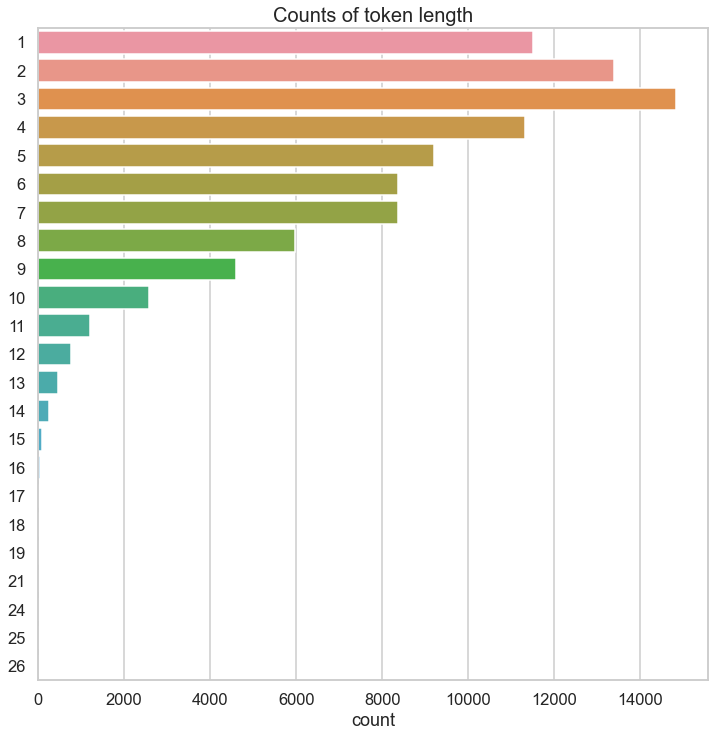

In [70]:
# Create list of token lengths for each token
token_length = [len(t) for t in tokens]# Average number of characters per token
print(f"Average number of characters per token: {round(np.mean(token_length),4)}")# Plot distribution
plt.figure(figsize=(12, 12))
sns.countplot(y=token_length)
plt.title("Counts of token length", size=20);

In [71]:
pd.DataFrame(data=token_length, columns=['length']).query("length>10").value_counts()

length
11        1214
12         766
13         468
14         254
15          98
16          41
18          28
17          17
19          10
21           1
24           1
25           1
26           1
dtype: int64

In [102]:
##What are those long words?
[t for t in tokens if len(t)>=20]

['Cheriyathura-Beemappally',
 'actress-turned-politician',
 'Sub-Registrar-Cooperatives',
 'Gangaikondacholapuram']

In [74]:
## loading stopwords from nltk
stop_words = stopwords.words("english")
stop_words.extend(["cannot", "could", "done", "let", "may" "mayn",  "might", "must", "need", "ought", "oughtn", "shall", "would", "br"])
print(f"There are {len(stop_words)} stopwords.\n")

There are 192 stopwords.



In [76]:
##what are the most common stop words
freq_stopwords = [(sw, tokens_norm.count(sw)) for sw in stop_words]
freq_stopwords.sort(key=lambda x: x[1], reverse=True)
freq_stopwords[:10]

[('the', 6087),
 ('of', 2541),
 ('in', 2296),
 ('a', 2046),
 ('and', 1901),
 ('to', 1851),
 ('on', 1285),
 ('at', 679),
 ('by', 644),
 ('for', 548)]

In [77]:
n_stopwords = len([t for t in tokens_norm if t in stop_words])
print(f"{n_stopwords} tokens are stop words.")
print(f"That is {round(100*n_stopwords/len(tokens_norm),2)}%.")

30665 tokens are stop words.
That is 33.04%.


In [79]:
##What are the most common tokens, bigrams, trigrams and fourgrams
tokens_clean = [t for t in tokens_norm if t not in stop_words]
print(f"Number of tokens w/o stopwords: {len(tokens_clean)}")

Number of tokens w/o stopwords: 62159


In [80]:
def preprocess_text(text):
    """Preprocess text into normalised tokens."""
    # Tokenise words into alphabetic tokens
    tokeniser = RegexpTokenizer(r'[A-Za-z]{2,}')
    tokens = tokeniser.tokenize(text)
    
    # Lowercase and lemmatise 
    lemmatiser = WordNetLemmatizer()
    lemmas = [lemmatiser.lemmatize(token.lower(), pos='v') for token in tokens]
    
    # Remove stopwords
    keywords= [lemma for lemma in lemmas if lemma not in stop_words]
    return keywords

In [81]:
def get_frequent_ngram(corpus, ngram, n=20):
    """Find most common n n-grams tokens."""
    # Preprocess each document
    documents = [preprocess_text(document) for document in corpus]
    
    # Find ngrams per document
    n_grams = [list(ngrams(document, ngram)) for document in documents]
    
    # Find frequency of ngrams
    n_grams_flattened = [item for sublist in n_grams for item in sublist]
    freq_dist = FreqDist(n_grams_flattened)
    top_freq = freq_dist.most_common(n)
    return pd.DataFrame(top_freq, columns=["ngram", "count"])

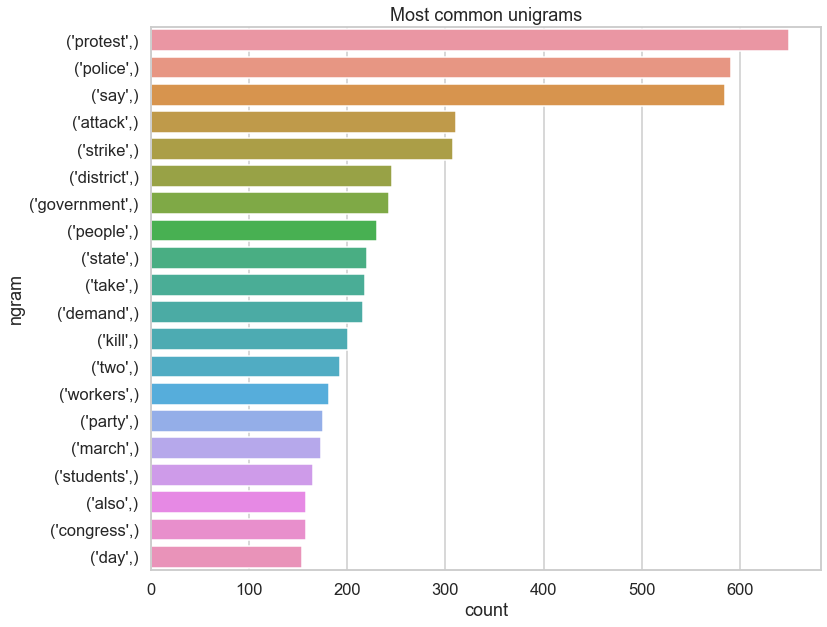

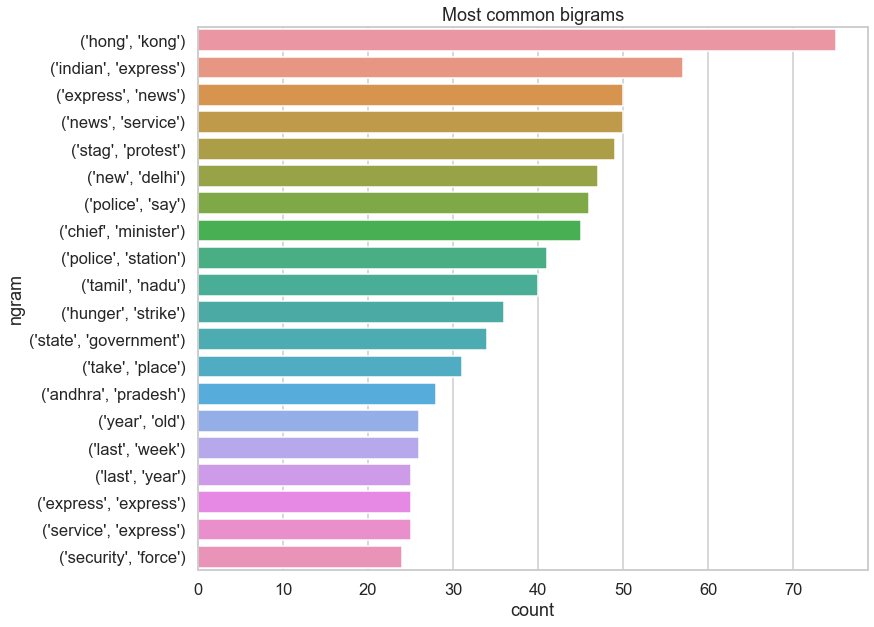

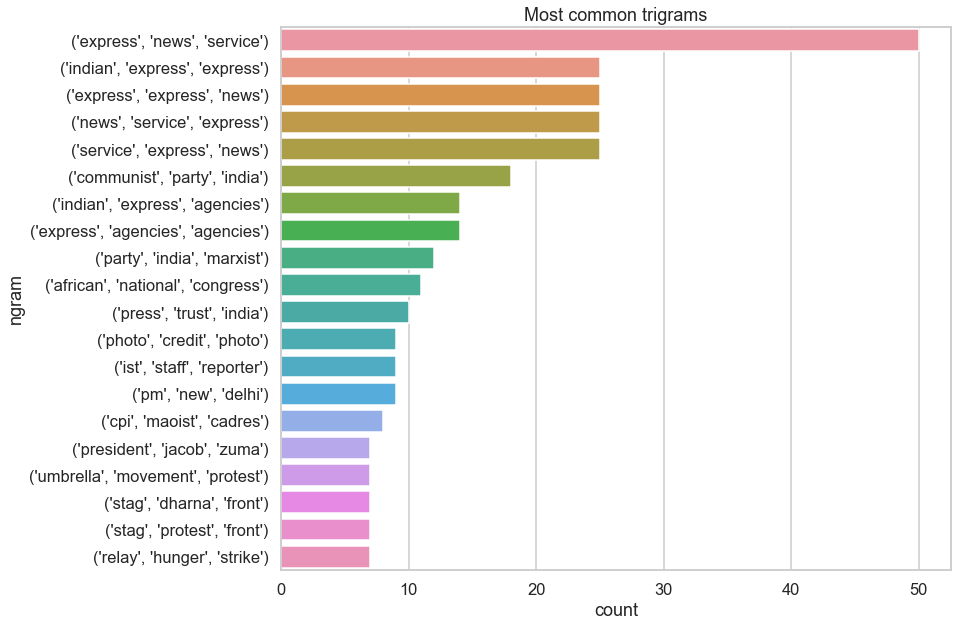

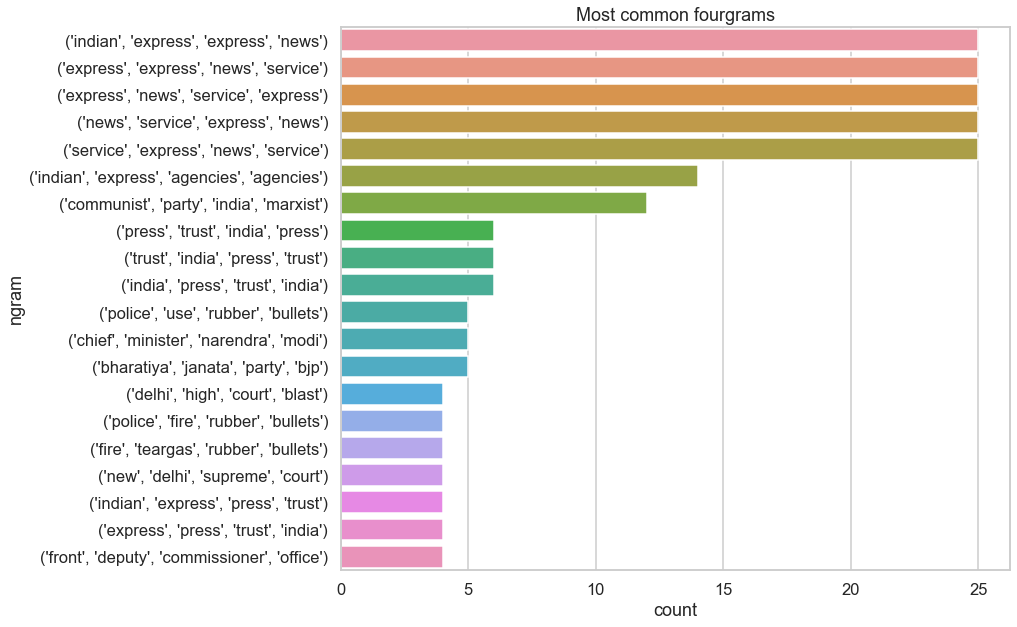

In [83]:
# Get frequent ngrams for all 4
for i in range(1,5):
    mapping = {1:"uni", 2:"bi", 3:"tri", 4:"four"}
    plt.figure(figsize=(12,10))
    sns.barplot(x="count", y="ngram", data=get_frequent_ngram(subtask1_df['text'], i))
    plt.title(f"Most common {mapping[i]}grams");

In [85]:
# tokeniser = RegexpTokenizer("[A-Za-z]+")
subtask1_df["n_sentences"] = subtask1_df["text"].apply(sent_tokenize).apply(len)
#train["tokens"] = subtask1_df["text"].apply(tokeniser.tokenize)
subtask1_df["n_tokens"] = subtask1_df["tokens"].apply(len)
subtask1_df["n_characters"] = subtask1_df["text"].apply(len)
subtask1_df["n_stopwords"] = subtask1_df["tokens"].apply(lambda tokens: len([t for t in tokens if t in stop_words]))
subtask1_df["p_stopwords"] = subtask1_df["n_stopwords"]/subtask1_df["n_tokens"]

In [87]:
# Inspect head
columns = ['label', 'n_sentences', 'n_tokens', 'n_characters', 'n_stopwords', 'p_stopwords']
subtask1_df[columns].head()

,label,n_sentences,n_tokens,n_characters,n_stopwords,p_stopwords
0,1,1,40,195,8,0.200000
1,0,1,23,112,10,0.434783
2,0,1,7,41,1,0.142857
3,0,1,28,148,11,0.392857
4,0,1,13,78,4,0.307692


In [88]:
subtask1_df.describe()

,label,agreement,num_votes,n_sentences,n_tokens,n_characters,n_stopwords,p_stopwords
count,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000
mean,0.548034,0.835783,2.481368,1.043419,31.803077,178.714872,10.116239,0.321748
std,0.497772,0.207639,0.505183,0.249134,16.015880,91.393357,5.510855,0.091879
min,0.000000,0.500000,1.000000,1.000000,5.000000,21.000000,0.000000,0.000000
25%,0.000000,0.666667,2.000000,1.000000,20.000000,112.000000,6.000000,0.258621
50%,1.000000,1.000000,2.000000,1.000000,29.000000,160.000000,9.000000,0.322581
75%,1.000000,1.000000,3.000000,1.000000,41.000000,229.000000,13.000000,0.387755
max,1.000000,1.000000,3.000000,8.000000,136.000000,872.000000,53.000000,0.600000


In [89]:
num_vars = subtask1_df.select_dtypes(np.number).columns
subtask1_df.groupby("label")[num_vars].agg(["mean", "median"])
#Intresting to see that longer sentences are positive examples

label        agreement           num_votes        n_sentences         \
       mean median      mean    median      mean median        mean median   
label                                                                        
0       0.0    0.0   0.77887  0.666667  2.559002    3.0    1.052950    1.0   
1       1.0    1.0   0.88272  1.000000  2.417342    2.0    1.035558    1.0   

        n_tokens        n_characters        n_stopwords        p_stopwords  \
            mean median         mean median        mean median        mean   
label                                                                        
0      27.342663   24.0    152.04236  138.0    8.575643    8.0    0.314427   
1      35.481597   32.0    200.71179  182.0   11.386775   10.0    0.327785   

                 
         median  
label            
0      0.319091  
1      0.323944

In [90]:
def plot_distribution(df, var, hue):
    """Plot overlayed histogram and density plot per label."""
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[16,4])
    
    # Histogram
    sns.histplot(data=df, x=var, hue=hue, bins=30, kde=False, ax=ax[0])
    ax[0].set_title(f"Histogram for {var}")
    
    # Density plot
    sns.kdeplot(data=df, x=var, hue=hue, shade=True, ax=ax[1])
    ax[1].set_title(f"Density plot for {var}");

/opt/homebrew/Caskroom/miniforge/base/envs/cnc_task/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


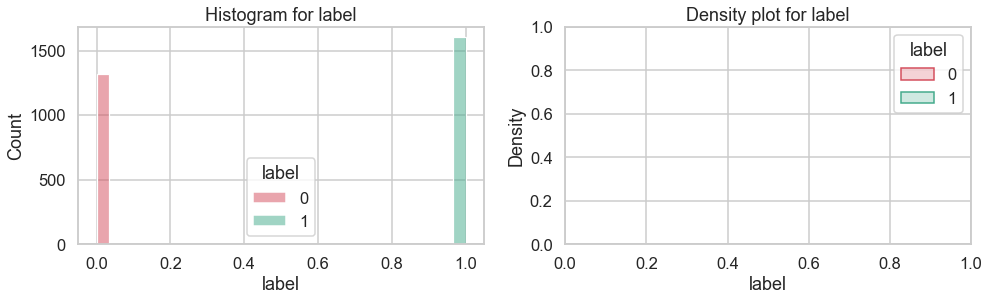

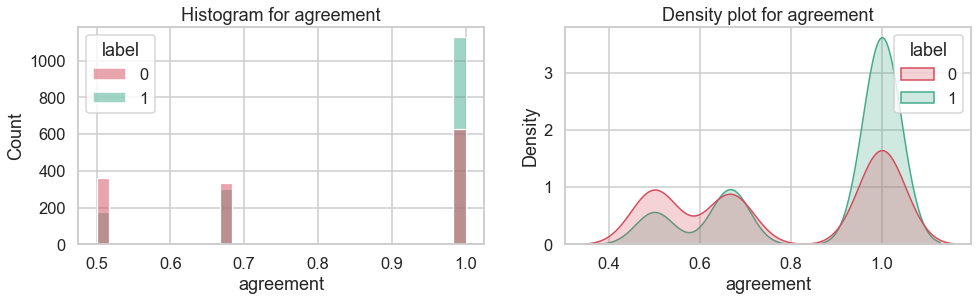

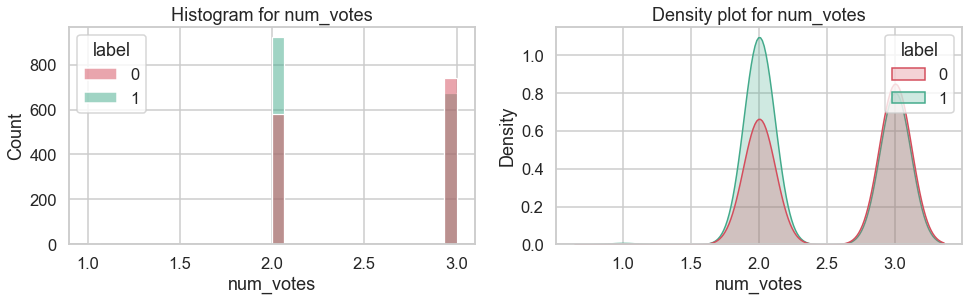

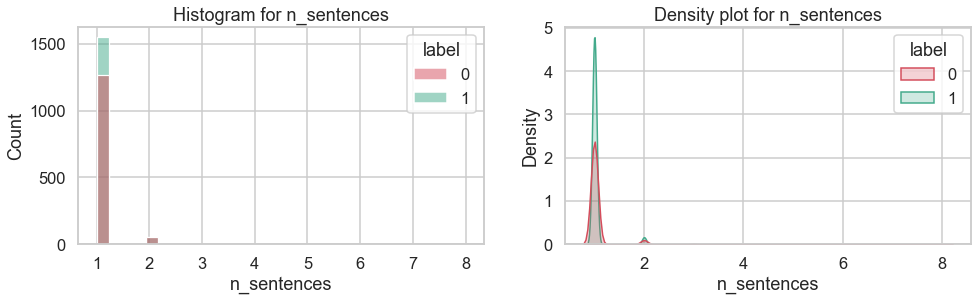

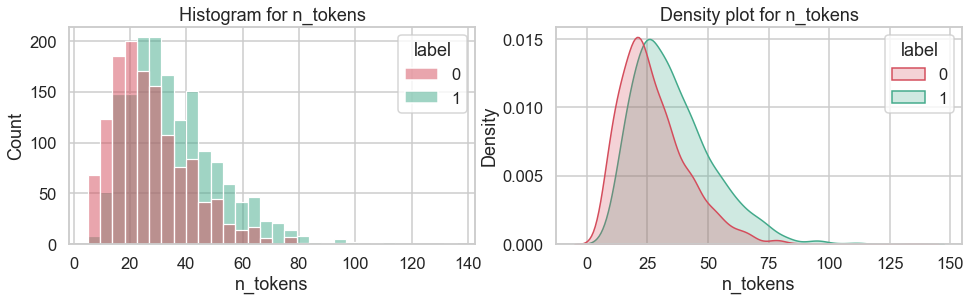

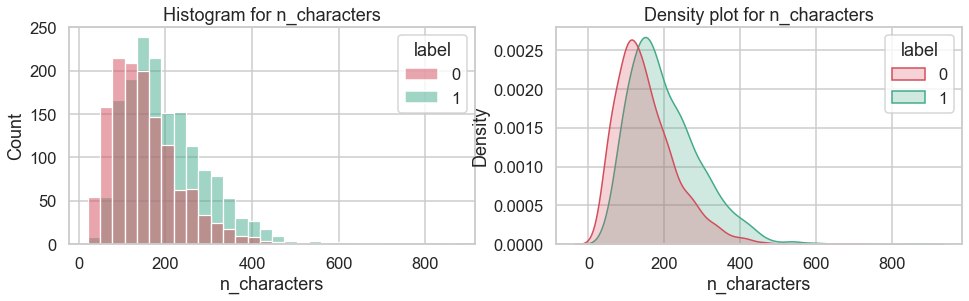

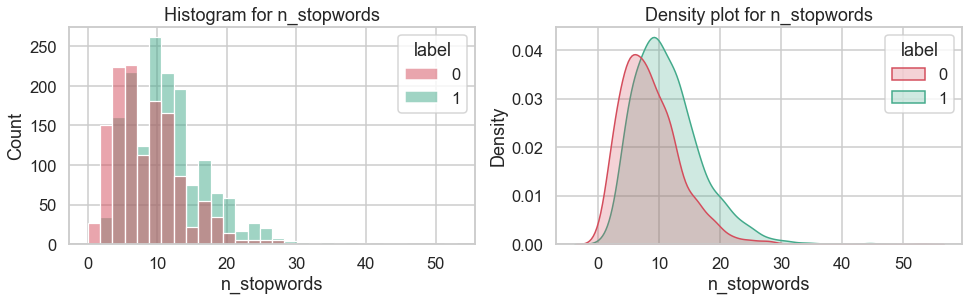

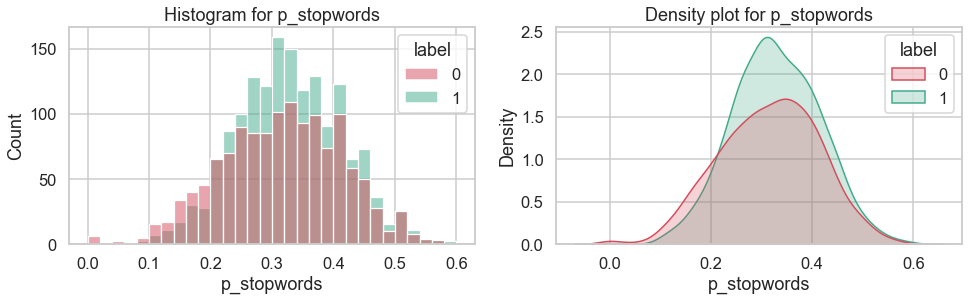

In [92]:
# Plot for all numerical variables
for var in num_vars:
    plot_distribution(subtask1_df, var, 'label')

In [97]:
pos_documents = [preprocess_text(document) for document in subtask1_df.loc[subtask1_df['label']==1, 'text']]
pos_tokens = [item for sublist in pos_documents for item in sublist]
pos_freq = FreqDist(pos_tokens)
pos_common = [word for word, frequency in pos_freq.most_common(20)]
print(f"***** 20 frequent tokens in positive reviews: *****\n{pos_common}\n")

neg_documents = [preprocess_text(document) for document in subtask1_df.loc[subtask1_df['label']==0, 'text']]
neg_tokens = [item for sublist in neg_documents for item in sublist]
neg_freq = FreqDist(neg_tokens)
neg_common = [word for word, frequency in neg_freq.most_common(20)]
print(f"***** 20 frequent tokens in negative reviews: *****\n{neg_common}\n")

common = set(neg_common).union(pos_common)
print(f"***** Their union: *****\n{common}\n")

***** 20 frequent tokens in positive reviews: *****
['protest', 'police', 'say', 'demand', 'strike', 'attack', 'government', 'people', 'state', 'district', 'take', 'kill', 'arrest', 'ist', 'two', 'workers', 'express', 'march', 'party', 'violence']

***** 20 frequent tokens in negative reviews: *****
['say', 'police', 'protest', 'attack', 'strike', 'district', 'also', 'take', 'people', 'congress', 'government', 'state', 'two', 'party', 'workers', 'minister', 'march', 'kill', 'group', 'students']

***** Their union: *****
{'two', 'congress', 'students', 'express', 'police', 'say', 'take', 'district', 'march', 'state', 'minister', 'also', 'violence', 'government', 'group', 'protest', 'attack', 'demand', 'workers', 'strike', 'people', 'ist', 'arrest', 'kill', 'party'}



In [98]:
# Create a dataframe containing the common tokens and their frequency
common_freq = pd.DataFrame(index=common, columns=["neg", "pos"])
for token in common:
    common_freq.loc[token, "pos"] = pos_freq[token]
    common_freq.loc[token, "neg"] = neg_freq[token]
common_freq.sort_values(by="pos", inplace=True)

# Add ranks and rank difference
common_freq['pos_rank'] = common_freq['pos'].rank()
common_freq['neg_rank'] = common_freq['neg'].rank()
common_freq['rank_diff'] = common_freq['neg_rank'] - common_freq['pos_rank']
common_freq.sort_values(by='rank_diff', inplace=True)
common_freq.head()

,neg,pos,pos_rank,neg_rank,rank_diff
demand,29,187,22.0,3.0,-19.0
arrest,24,122,13.0,1.0,-12.0
ist,28,118,12.0,2.0,-10.0
kill,70,131,14.0,9.0,-5.0
express,47,105,9.0,4.0,-5.0


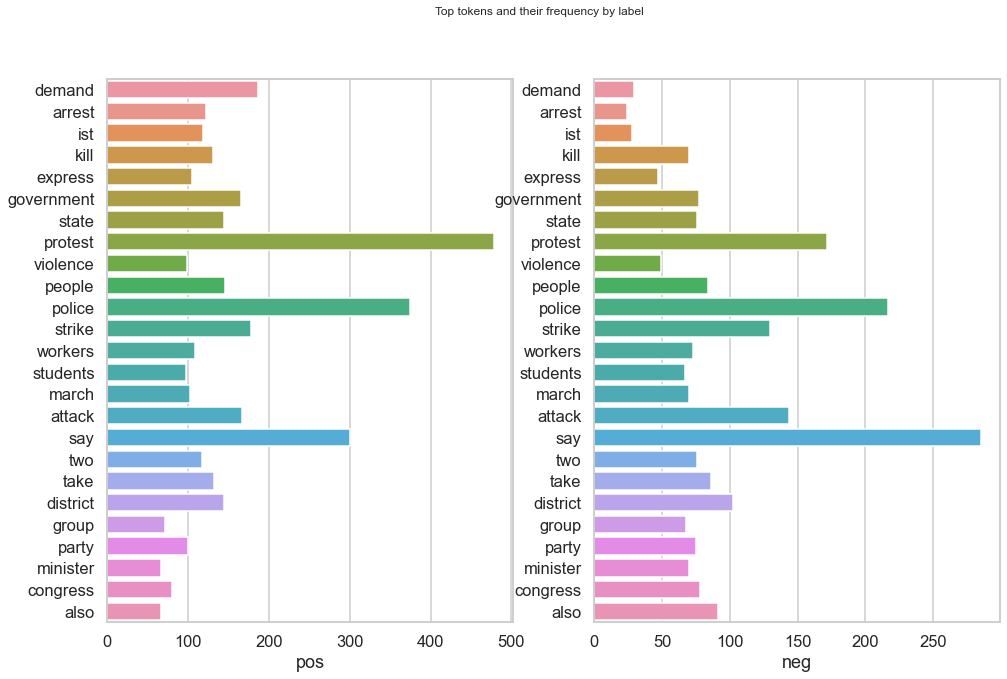

In [99]:
fig, ax =plt.subplots(1, 2, figsize=(16, 10))
sns.barplot(x="pos", y=common_freq.index, data = common_freq, ax=ax[0])
sns.barplot(x="neg", y=common_freq.index, data = common_freq, ax=ax[1])
fig.suptitle('Top tokens and their frequency by label');

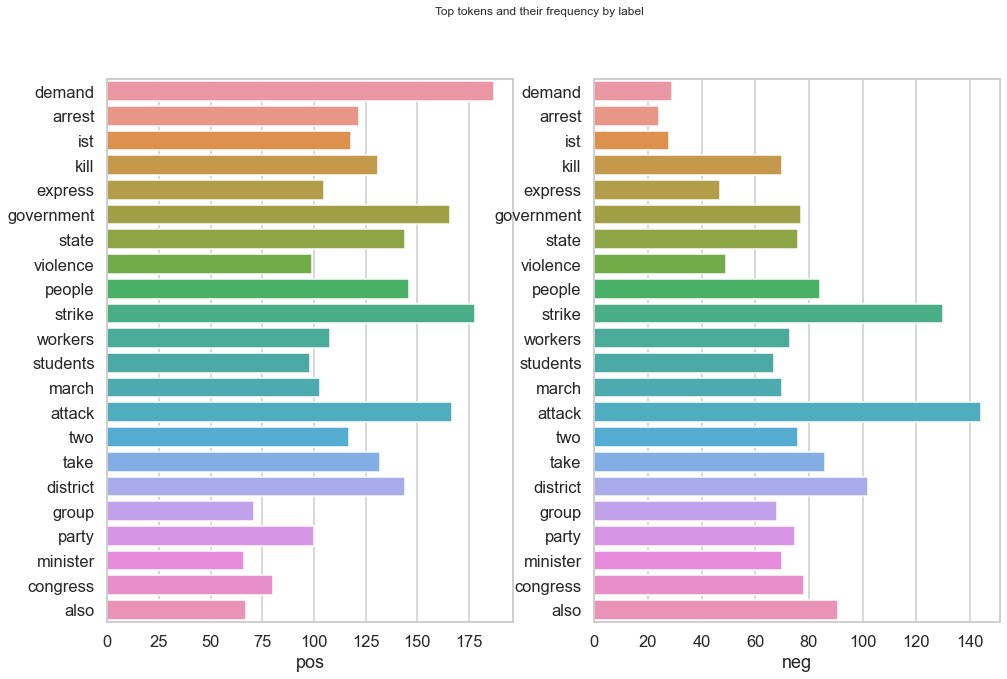

In [101]:
rest = common_freq.index.drop(['protest', 'police','say'])
fig, ax =plt.subplots(1, 2, figsize=(16, 10))
sns.barplot(x="pos", y=rest, data = common_freq.loc[rest], ax=ax[0])
sns.barplot(x="neg", y=rest, data = common_freq.loc[rest], ax=ax[1])
fig.suptitle('Top tokens and their frequency by label');